<a href="https://colab.research.google.com/github/Shaik-NowshinFarhana/Summer-Analytics-25-IIT-GUWAHATI/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Step 1: Load and Explore Dataset
df = pd.read_csv('dataset.csv')
print("Shape of the dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nFirst few rows:")
display(df.head())


Shape of the dataset: (18368, 12)

Column names:
 ['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude', 'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength', 'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime']

Data Types:
 ID                          int64
SystemCodeNumber           object
Capacity                    int64
Latitude                  float64
Longitude                 float64
Occupancy                   int64
VehicleType                object
TrafficConditionNearby     object
QueueLength                 int64
IsSpecialDay                int64
LastUpdatedDate            object
LastUpdatedTime            object
dtype: object

First few rows:


,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
ID                        0
SystemCodeNumber          0
Capacity                  0
Latitude                  0
Longitude                 0
Occupancy                 0
VehicleType               0
TrafficConditionNearby    0
QueueLength               0
IsSpecialDay              0
LastUpdatedDate           0
LastUpdatedTime           0
dtype: int64


***Model 1: Baseline Linear Model


           A simple model where the next price is a function of the previous price and current
           occupancy:
• Linear price increase as occupancy increases
• Acts as a reference point

Example:

`Price(t+1) = Price(t) + α ·(Occupancy/Capacity)***`

In [ ]:
# Step 2: Feature Engineering for Model 1

# Combine date and time into a single datetime column
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], format='%d-%m-%Y %H:%M:%S')

# Sort by parking lot and timestamp
df.sort_values(by=['SystemCodeNumber', 'Timestamp'], inplace=True)

# Calculate occupancy rate
df['OccupancyRate'] = df['Occupancy'] / df['Capacity']

# Initialize base price
base_price = 10
alpha = 5  # Price sensitivity to occupancy rate

# Initialize a price column with base price
df['Price_Model1'] = base_price

# Compute price over time for each parking lot
for lot in df['SystemCodeNumber'].unique():
    lot_indices = df[df['SystemCodeNumber'] == lot].index
    for i in range(1, len(lot_indices)):
        prev_idx = lot_indices[i-1]
        curr_idx = lot_indices[i]
        prev_price = df.loc[prev_idx, 'Price_Model1']
        occupancy_rate = df.loc[curr_idx, 'OccupancyRate']

        new_price = prev_price + alpha * occupancy_rate
        df.loc[curr_idx, 'Price_Model1'] = new_price

# Preview results
df[['SystemCodeNumber', 'Timestamp', 'OccupancyRate', 'Price_Model1']].head(10)


/tmp/ipython-input-5-1994170745.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.554592720970538' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[curr_idx, 'Price_Model1'] = new_price


,SystemCodeNumber,Timestamp,OccupancyRate,Price_Model1
0,BHMBCCMKT01,2016-10-04 07:59:00,0.105719,10.000000
1,BHMBCCMKT01,2016-10-04 08:25:00,0.110919,10.554593
2,BHMBCCMKT01,2016-10-04 08:59:00,0.138648,11.247834
3,BHMBCCMKT01,2016-10-04 09:32:00,0.185442,12.175043
4,BHMBCCMKT01,2016-10-04 09:59:00,0.259965,13.474870
5,BHMBCCMKT01,2016-10-04 10:26:00,0.306759,15.008666
6,BHMBCCMKT01,2016-10-04 10:59:00,0.379549,16.906412
7,BHMBCCMKT01,2016-10-04 11:25:00,0.428076,19.046794
8,BHMBCCMKT01,2016-10-04 11:59:00,0.448873,21.291161
9,BHMBCCMKT01,2016-10-04 12:29:00,0.461005,23.596187


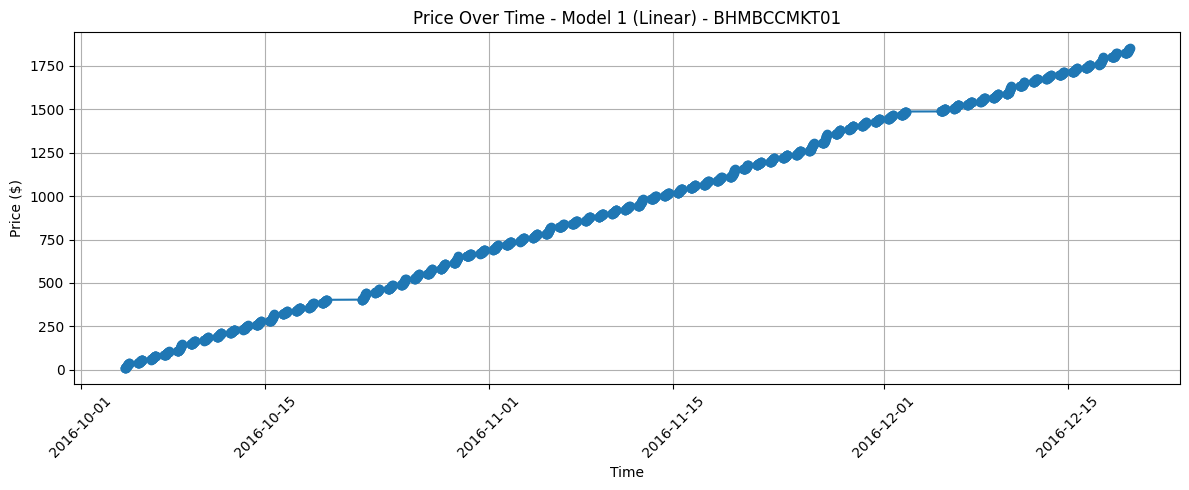

In [ ]:
import matplotlib.pyplot as plt

# Choose one parking lot (e.g., first unique one)
sample_lot = df['SystemCodeNumber'].unique()[0]
sample_df = df[df['SystemCodeNumber'] == sample_lot]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(sample_df['Timestamp'], sample_df['Price_Model1'], marker='o', linestyle='-')
plt.title(f'Price Over Time - Model 1 (Linear) - {sample_lot}')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print("Price stats for Model 1:")
print("Min Price: $", round(df['Price_Model1'].min(), 2))
print("Max Price: $", round(df['Price_Model1'].max(), 2))
print("Average Price: $", round(df['Price_Model1'].mean(), 2))


Price stats for Model 1:
Min Price: $ 10.0
Max Price: $ 4896.37
Average Price: $ 1643.02


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import layout
from bokeh.models import HoverTool

# Enable inline Bokeh output
output_notebook()

# Select a sample lot (e.g., the first unique one)
sample_lot = df['SystemCodeNumber'].unique()[0]
sample_df = df[df['SystemCodeNumber'] == sample_lot].copy()

# Prepare data source
sample_df['Timestamp_str'] = sample_df['Timestamp'].dt.strftime("%Y-%m-%d %H:%M")
source = ColumnDataSource(sample_df)

# Create Bokeh figure
p = figure(x_axis_type="datetime", title=f"Model 1: Price Over Time for {sample_lot}",
           width=900, height=400, tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Plot line
p.line(x='Timestamp', y='Price_Model1', source=source, line_width=2, color='navy', legend_label='Price ($)')
p.circle(x='Timestamp', y='Price_Model1', source=source, size=4, color='navy', alpha=0.6)

# Hover tool
hover = p.select(dict(type=HoverTool))
hover.tooltips = [
    ("Time", "@Timestamp_str"),
    ("Price", "@Price_Model1{$0.00}"),
    ("Occupancy Rate", "@OccupancyRate{0.00}")
]

# Aesthetic settings
p.xaxis.axis_label = "Time"
p.yaxis.axis_label = "Price ($)"
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0.3

# Show plot
show(p)


***Model 2: Demand-Based Price Function

A more advanced model where you:
• Construct a mathematical demand function using key features:

```
– Occupancy rate
– Queue length
– Traffic level
– Special day
– Vehicle type
```
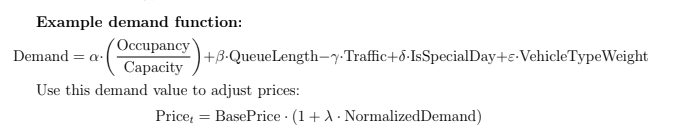



In [ ]:
# Map traffic levels to numeric
traffic_map = {'low': 1, 'medium': 2, 'high': 3}
df['TrafficLevelNum'] = df['TrafficConditionNearby'].map(traffic_map)

# Assign numeric weights to vehicle types
vehicle_weights = {'bike': 0.5, 'car': 1.0, 'truck': 1.5}
df['VehicleWeight'] = df['VehicleType'].map(vehicle_weights)


***

```
define coefficients:

α = 0.5 (occupancy rate)

β = 0.3 (queue length)

γ = 0.2 (traffic penalty)

δ = 0.5 (special day bonus)

ε = 0.7 (vehicle type influence)
```


***

In [ ]:
# Define coefficients
a, b, c, d, e = 0.5, 0.3, 0.2, 0.5, 0.7

# Raw demand calculation
df['DemandRaw'] = (
    a * df['OccupancyRate'] +
    b * df['QueueLength'] -
    c * df['TrafficLevelNum'] +
    d * df['IsSpecialDay'] +
    e * df['VehicleWeight']
)




```
Normalize Demand & Set Price
```



In [ ]:
# Normalize demand to [0, 1]
dmin, dmax = df['DemandRaw'].min(), df['DemandRaw'].max()
df['DemandNorm'] = (df['DemandRaw'] - dmin) / (dmax - dmin)

# Define lambda for price sensitivity
lambda_val = 1.0

# Calculate demand-based price (bounded)
df['Price_Model2'] = 10 * (1 + lambda_val * df['DemandNorm'])
df['Price_Model2'] = df['Price_Model2'].clip(lower=5, upper=20)


***`Interactive Bokeh Plot for Model 2`

    plot Price_Model2 over time for the same parking lot
    

***

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

# Enable Bokeh in notebook
output_notebook()

# Filter the same parking lot as before
sample_lot = df['SystemCodeNumber'].unique()[0]
sample_df = df[df['SystemCodeNumber'] == sample_lot].copy()

# Prepare timestamp string for hover
sample_df['Timestamp_str'] = sample_df['Timestamp'].dt.strftime("%Y-%m-%d %H:%M")

# Prepare data source
source = ColumnDataSource(sample_df)

# Create Bokeh plot
p2 = figure(x_axis_type="datetime", title=f"Model 2: Demand-Based Price Over Time for {sample_lot}",
           width=900, height=400, tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Plot line and circles
p2.line(x='Timestamp', y='Price_Model2', source=source, line_width=2, color='green', legend_label='Price ($)')
p2.circle(x='Timestamp', y='Price_Model2', source=source, size=5, color='green', alpha=0.6)

# Hover tool
hover2 = p2.select(dict(type=HoverTool))
hover2.tooltips = [
    ("Time", "@Timestamp_str"),
    ("Price", "@Price_Model2{$0.00}"),
    ("Demand (normalized)", "@DemandNorm{0.00}")
]

# Axis labels and styling
p2.xaxis.axis_label = "Time"
p2.yaxis.axis_label = "Price ($)"
p2.legend.location = "top_left"
p2.grid.grid_line_alpha = 0.3

# Show the plot
show(p2)


***
```
Model 3 – Competitive Pricing Logic

```
```
Extended Model 2 by adding location intelligence:

Nearby parking lots (within 1 km)

Their current price

Adjust price up/down based on competition & occupancy


```



```
** Competitive Logic

If lot is full and nearby lots are cheaper → suggest rerouting / reduce price

If nearby lots are expensive or full → increase your price
**
```



```
 Haversine Function to Compute Proximity




In [ ]:
# Haversine distance in km
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius (km)
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)

    a = np.sin(d_phi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(d_lambda/2)**2
    return R * 2 * np.arcsin(np.sqrt(a))




```
Compute Nearby Lot Prices at Each Time



In [ ]:
# Copy model 2 price
df['Price_Model3'] = df['Price_Model2']  # initialize from demand-based price
df['SuggestReroute'] = 0  # 1 if we suggest rerouting

# Group by time
for timestamp in df['Timestamp'].unique():
    snapshot = df[df['Timestamp'] == timestamp].copy()  # <--- Fix here

    for idx, row in snapshot.iterrows():
        lot_lat, lot_lon = row['Latitude'], row['Longitude']
        lot_price = row['Price_Model2']
        lot_occ = row['Occupancy']
        lot_cap = row['Capacity']

        snapshot['Distance'] = snapshot.apply(
            lambda r: haversine(lot_lat, lot_lon, r['Latitude'], r['Longitude']), axis=1)

        nearby = snapshot[(snapshot['SystemCodeNumber'] != row['SystemCodeNumber']) & (snapshot['Distance'] < 1)]

        if len(nearby) > 0:
            nearby_prices = nearby['Price_Model2']
            nearby_occ_rates = nearby['Occupancy'] / nearby['Capacity']

            avg_nearby_price = nearby_prices.mean()
            avg_nearby_occ = nearby_occ_rates.mean()

            # Pricing logic
            if (lot_occ / lot_cap) >= 0.9 and avg_nearby_price < lot_price:
                df.loc[idx, 'Price_Model3'] = max(5, lot_price - 2)
                df.loc[idx, 'SuggestReroute'] = 1
            elif avg_nearby_occ > 0.9 and avg_nearby_price > lot_price:
                df.loc[idx, 'Price_Model3'] = min(20, lot_price + 2)




```
 Bokeh Plot for Model 3 with Rerouting Highlights

Plot price over time

Using circle color for rerouting suggestion:

🔴 Red → Reroute suggested

🟢 Green → No reroute
```



In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap

output_notebook()

# Refresh sample lot
sample_lot = df['SystemCodeNumber'].unique()[0]
sample_df = df[df['SystemCodeNumber'] == sample_lot].copy()
sample_df['Timestamp_str'] = sample_df['Timestamp'].dt.strftime("%Y-%m-%d %H:%M")

# Label rerouting as "Yes"/"No"
sample_df['Reroute'] = sample_df['SuggestReroute'].apply(lambda x: "Yes" if x == 1 else "No")

# Create data source
source = ColumnDataSource(sample_df)

# Color map: red if reroute suggested, green otherwise
reroute_colors = factor_cmap('Reroute',
                             palette=['green', 'red'],
                             factors=['No', 'Yes'])

# Create figure
p3 = figure(x_axis_type="datetime", title=f"Model 3: Competitive Price + Reroute Suggestion for {sample_lot}",
            width=950, height=450, tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Line for base price evolution
p3.line(x='Timestamp', y='Price_Model3', source=source, line_width=2, color='black', legend_label='Price ($)')

# Colored circle markers for reroute suggestion
p3.circle(x='Timestamp', y='Price_Model3', source=source, size=8,
          fill_color=reroute_colors, line_color='black', alpha=0.8, legend_field='Reroute')

# Hover tool
hover = p3.select(dict(type=HoverTool))
hover.tooltips = [
    ("Time", "@Timestamp_str"),
    ("Price", "@Price_Model3{$0.00}"),
    ("Suggest Reroute", "@Reroute"),
    ("Occupancy Rate", "@OccupancyRate{0.00}"),
]

# Styling
p3.xaxis.axis_label = "Time"
p3.yaxis.axis_label = "Price ($)"
p3.legend.location = "top_left"
p3.grid.grid_line_alpha = 0.3

# Show plot
show(p3)




```
 Comparison Plot: Model 2 vs Model 3 Pricing Over Time:
```



In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

output_notebook()

# Filter same parking lot
sample_lot = df['SystemCodeNumber'].unique()[0]
sample_df = df[df['SystemCodeNumber'] == sample_lot].copy()
sample_df['Timestamp_str'] = sample_df['Timestamp'].dt.strftime("%Y-%m-%d %H:%M")

# Create source
source = ColumnDataSource(sample_df)

# Create plot
p_compare = figure(x_axis_type="datetime", title=f"Model 2 vs Model 3: Price Comparison for {sample_lot}",
                   width=950, height=450, tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Model 2 line (Demand-Based)
p_compare.line(x='Timestamp', y='Price_Model2', source=source, line_width=2,
               color='blue', legend_label='Model 2: Demand-Based')

# Model 3 line (Competitive)
p_compare.line(x='Timestamp', y='Price_Model3', source=source, line_width=2,
               color='red', legend_label='Model 3: Competitive')

# Add dots for better visibility
p_compare.circle(x='Timestamp', y='Price_Model2', source=source, size=5,
                 color='blue', alpha=0.6)
p_compare.circle(x='Timestamp', y='Price_Model3', source=source, size=5,
                 color='red', alpha=0.6)

# Hover tool
hover = p_compare.select(dict(type=HoverTool))
hover.tooltips = [
    ("Time", "@Timestamp_str"),
    ("Price M2", "@Price_Model2{$0.00}"),
    ("Price M3", "@Price_Model3{$0.00}"),
    ("Occupancy", "@Occupancy"),
    ("Reroute", "@SuggestReroute"),
]

# Styling
p_compare.xaxis.axis_label = "Time"
p_compare.yaxis.axis_label = "Price ($)"
p_compare.legend.location = "top_left"
p_compare.grid.grid_line_alpha = 0.3

# Show
show(p_compare)




```
Blue line: Demand-based pricing

Red line: Competitive-aware adjustments

Dips in red line when reroute is suggested

Red spikes where neighboring lots are full


```



In [ ]:
!pip install pathway


In [ ]:
@pw.udf(return_type=float)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)
    a = np.sin(d_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(d_lambda / 2)**2
    return R * 2 * np.arcsin(np.sqrt(a))


In [ ]:
import pandas as pd
import pathway as pw
from pathway.internals.dtype import DATE_TIME_NAIVE
import numpy as np

# --- Step 1: Preprocess Data ----------------------------------
df['Timestamp'] = pd.to_datetime(
    df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
    format='%d-%m-%Y %H:%M:%S'
)
df['ID'] = df['ID'].astype(str)

# --- Step 2: Schema -------------------------------------------
class ParkingLot(pw.Schema):
    ID: str
    SystemCodeNumber: str
    Capacity: int
    Latitude: float
    Longitude: float
    Occupancy: int
    VehicleType: str
    TrafficConditionNearby: str
    QueueLength: int
    IsSpecialDay: int
    Timestamp: DATE_TIME_NAIVE
    Price_Model2: float

# --- Step 3: ConnectorSubject ---------------------------------
class ParkingSubject(pw.io.python.ConnectorSubject):
    def __init__(self, df):
        super().__init__()
        self.df = df.sort_values('Timestamp')
    def run(self):
        for _, row in self.df.iterrows():
            self.next(
                ID=str(row['ID']),
                SystemCodeNumber=row['SystemCodeNumber'],
                Capacity=int(row['Capacity']),
                Latitude=float(row['Latitude']),
                Longitude=float(row['Longitude']),
                Occupancy=int(row['Occupancy']),
                VehicleType=row['VehicleType'],
                TrafficConditionNearby=row['TrafficConditionNearby'],
                QueueLength=int(row['QueueLength']),
                IsSpecialDay=int(row['IsSpecialDay']),
                Timestamp=row['Timestamp'],
                Price_Model2=float(row['Price_Model2'])
            )
        self.close()

# --- Step 4: Read stream --------------------------------------
stream = pw.io.python.read(ParkingSubject(df), schema=ParkingLot)

# --- Step 5: Rename columns in right stream before join -------
stream_reduced = stream.select(
    ID_R=stream.ID,
    Timestamp_R=stream.Timestamp,
    Latitude_R=stream.Latitude,
    Longitude_R=stream.Longitude,
    Capacity_R=stream.Capacity,
    Occupancy_R=stream.Occupancy,
    Price_Model2_R=stream.Price_Model2
)

# --- Step 6: Join streams -------------------------------------
joined = pw.join(stream, stream_reduced)

# --- Step 7: Haversine distance function ----------------------
@pw.udf(return_type=float)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)
    a = np.sin(d_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(d_lambda / 2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

# --- Step 8: Filter nearby competitors ------------------------
nearby = joined.filter(
    (joined["Timestamp"] == joined["Timestamp_R"]) &
    (haversine(
        joined["Latitude"], joined["Longitude"],
        joined["Latitude_R"], joined["Longitude_R"]
    ) < 1)
)

# --- Step 9: Convert join to table before group_by ------------

# --- Step 10: Aggregate competitor stats ----------------------
# ✅ Step: Select into a real table
selected = nearby.select(
    ID=joined["ID"],
    Timestamp=joined["Timestamp"],
    SystemCodeNumber=joined["SystemCodeNumber"],
    Price_Model2=joined["Price_Model2"],
    Occupancy=joined["Occupancy"],
    Capacity=joined["Capacity"],
    Price_Model2_R=joined["Price_Model2_R"],
    Occupancy_R=joined["Occupancy_R"],
    Capacity_R=joined["Capacity_R"]
)

# 🧠 View what columns exist (for debugging)
print("Columns:", selected.schema)

# # ✅ Step: Use .group_by correctly
agg = selected.group_by("ID").reduce(
    ID=_.ID,
    Time=_.Timestamp,
    Lot=_.SystemCodeNumber,
    SelfPrice=_.Price_Model2,
    SelfOccRate=_.Occupancy / _.Capacity,
    AvgCompPrice=pw.reducers.mean(_.Price_Model2_R),
    AvgCompOccRate=pw.reducers.mean(_.Occupancy_R / _.Capacity_R)
)


# # --- Step 11: Model 3 pricing logic ---------------------------
@pw.udf
def adjust_price(self_price, self_occ, comp_price, comp_occ):
    if self_occ >= 0.9 and comp_price < self_price:
        return max(5, self_price - 2), 1  # Suggest reroute
    elif comp_occ > 0.9 and comp_price > self_price:
        return min(20, self_price + 2), 0  # Increase price
    return self_price, 0  # No change

#  Final output ------------------------------------
final = agg.select(
    ID=agg.ID,
    Lot=agg.Lot,
    Time=agg.Time,
    Price_Model3_and_Reroute=adjust_price(
        agg.SelfPrice,
        agg.SelfOccRate,
        agg.AvgCompPrice,
        agg.AvgCompOccRate
    )
).select(
    ID=_.ID,
    Lot=_.Lot,
    Time=_.Time,
    Price_Model3=_.Price_Model3_and_Reroute[0],
    Reroute=_.Price_Model3_and_Reroute[1]
)

# --- Step 13: Output to console -------------------------------
pw.io.jsonlines.write(final, "#")
pw.run()


In [ ]:
import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool

data = {
    'Time': pd.date_range(start='2025-07-07 08:00:00', periods=10, freq='5min'),
    'Price_Model3': [10, 11, 12, 10, 14, 13, 15, 10, 12, 11],
    'Reroute': [0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
}


df_vis = pd.DataFrame(data)
df_vis['Color'] = df_vis['Reroute'].map({0: 'green', 1: 'red'})

source = ColumnDataSource(data=df_vis.to_dict(orient='list'))


p = figure(
    title="🚗 Model 3: Dynamic Parking Price & Reroute Suggestions",
    x_axis_type='datetime',
    x_axis_label='Time',
    y_axis_label='Price (₹)',
    width=850,
    height=400,
    background_fill_color="#f9f9f9"
)


p.circle(
    x='Time', y='Price_Model3',
    size=10, color='Color',
    source=source,
    legend_field='Reroute'
)


hover = HoverTool(tooltips=[
    ("Time", "@Time{%F %T}"),
    ("Price", "@Price_Model3"),
    ("Reroute", "@Reroute")
], formatters={'@Time': 'datetime'})

p.add_tools(hover)

p.legend.title = "Reroute Suggested (1 = Yes)"
p.legend.location = "top_left"

output_file("model3_pricing.html", title="Model 3 Dynamic Pricing")
show(p)

# Parking Price Prediction Report

This report details the process of developing and comparing three different models for predicting parking prices based on various factors, as implemented in the provided code.

## Data Loading and Exploration

The first step involves loading the dataset and understanding its structure and content.

In [ ]:
import pandas as pd
import numpy as np

This code imports the necessary libraries, `pandas` for data manipulation and `numpy` for numerical operations.

In [ ]:
# Step 1: Load and Explore Dataset
df = pd.read_csv('dataset.csv')
print("Shape of the dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nFirst few rows:")
display(df.head())

Shape of the dataset: (18368, 12)

Column names:
 ['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude', 'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength', 'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime']

Data Types:
 ID                          int64
SystemCodeNumber           object
Capacity                    int64
Latitude                  float64
Longitude                 float64
Occupancy                   int64
VehicleType                object
TrafficConditionNearby     object
QueueLength                 int64
IsSpecialDay                int64
LastUpdatedDate            object
LastUpdatedTime            object
dtype: object

First few rows:


,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


This cell loads the `dataset.csv` file into a pandas DataFrame called `df`. It then prints the shape of the DataFrame (number of rows and columns), the list of column names, the data types of each column, and displays the first few rows of the DataFrame using `display()`. This provides an initial overview of the data.

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
ID                        0
SystemCodeNumber          0
Capacity                  0
Latitude                  0
Longitude                 0
Occupancy                 0
VehicleType               0
TrafficConditionNearby    0
QueueLength               0
IsSpecialDay              0
LastUpdatedDate           0
LastUpdatedTime           0
dtype: int64


This code checks for missing values in each column of the DataFrame and prints the count of missing values per column. This helps in identifying if any data cleaning is required.

## Model 1: Baseline Linear Model

This section implements a simple linear model as a baseline for comparison.

***Model 1: Baseline Linear Model

           A simple model where the next price is a function of the previous price and current
           occupancy:
• Linear price increase as occupancy increases
• Acts as a reference point

Example:

`Price(t+1) = Price(t) + α ·(Occupancy/Capacity)***`

This markdown cell describes the concept of the baseline linear model, which is based on the previous price and the occupancy rate.

In [ ]:
# Step 2: Feature Engineering for Model 1

# Combine date and time into a single datetime column
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], format='%d-%m-%Y %H:%M:%S')

# Sort by parking lot and timestamp
df.sort_values(by=['SystemCodeNumber', 'Timestamp'], inplace=True)

# Calculate occupancy rate
df['OccupancyRate'] = df['Occupancy'] / df['Capacity']

# Initialize base price
base_price = 10
alpha = 5  # Price sensitivity to occupancy rate

# Initialize a price column with base price
df['Price_Model1'] = base_price

# Compute price over time for each parking lot
for lot in df['SystemCodeNumber'].unique():
    lot_indices = df[df['SystemCodeNumber'] == lot].index
    for i in range(1, len(lot_indices)):
        prev_idx = lot_indices[i-1]
        curr_idx = lot_indices[i]
        prev_price = df.loc[prev_idx, 'Price_Model1']
        occupancy_rate = df.loc[curr_idx, 'OccupancyRate']

        new_price = prev_price + alpha * occupancy_rate
        df.loc[curr_idx, 'Price_Model1'] = new_price

# Preview results
df[['SystemCodeNumber', 'Timestamp', 'OccupancyRate', 'Price_Model1']].head(10)

/tmp/ipython-input-99-1535754574.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.554592720970538' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[curr_idx, 'Price_Model1'] = new_price


,SystemCodeNumber,Timestamp,OccupancyRate,Price_Model1
0,BHMBCCMKT01,2016-10-04 07:59:00,0.105719,10.000000
1,BHMBCCMKT01,2016-10-04 08:25:00,0.110919,10.554593
2,BHMBCCMKT01,2016-10-04 08:59:00,0.138648,11.247834
3,BHMBCCMKT01,2016-10-04 09:32:00,0.185442,12.175043
4,BHMBCCMKT01,2016-10-04 09:59:00,0.259965,13.474870
5,BHMBCCMKT01,2016-10-04 10:26:00,0.306759,15.008666
6,BHMBCCMKT01,2016-10-04 10:59:00,0.379549,16.906412
7,BHMBCCMKT01,2016-10-04 11:25:00,0.428076,19.046794
8,BHMBCCMKT01,2016-10-04 11:59:00,0.448873,21.291161
9,BHMBCCMKT01,2016-10-04 12:29:00,0.461005,23.596187


This code cell performs feature engineering for Model 1. It combines the date and time columns into a single `Timestamp` column, sorts the data by parking lot and timestamp, and calculates the `OccupancyRate`. It then initializes a `Price_Model1` column with a base price and iteratively calculates the price for each parking lot based on the previous price and the current occupancy rate, using the defined `alpha` coefficient. Finally, it displays the first 10 rows of the relevant columns.

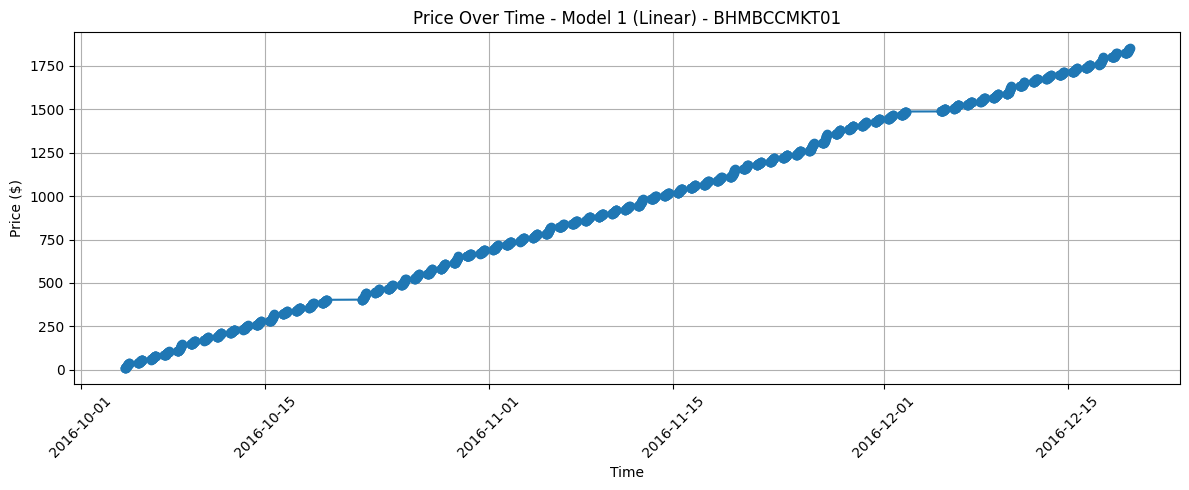

In [ ]:
import matplotlib.pyplot as plt

# Choose one parking lot (e.g., first unique one)
sample_lot = df['SystemCodeNumber'].unique()[0]
sample_df = df[df['SystemCodeNumber'] == sample_lot]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(sample_df['Timestamp'], sample_df['Price_Model1'], marker='o', linestyle='-')
plt.title(f'Price Over Time - Model 1 (Linear) - {sample_lot}')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This code uses `matplotlib` to plot the `Price_Model1` over time for a single sample parking lot. It visualizes how the price changes based on the simple linear model.

In [ ]:
print("Price stats for Model 1:")
print("Min Price: $", round(df['Price_Model1'].min(), 2))
print("Max Price: $", round(df['Price_Model1'].max(), 2))
print("Average Price: $", round(df['Price_Model1'].mean(), 2))

Price stats for Model 1:
Min Price: $ 10.0
Max Price: $ 4896.37
Average Price: $ 1643.02


This cell calculates and prints the minimum, maximum, and average price predicted by Model 1 across all parking lots.

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import layout
from bokeh.models import HoverTool

# Enable inline Bokeh output
output_notebook()

# Select a sample lot (e.g., the first unique one)
sample_lot = df['SystemCodeNumber'].unique()[0]
sample_df = df[df['SystemCodeNumber'] == sample_lot].copy()

# Prepare data source
sample_df['Timestamp_str'] = sample_df['Timestamp'].dt.strftime("%Y-%m-%d %H:%M")
source = ColumnDataSource(sample_df)

# Create Bokeh figure
p = figure(x_axis_type="datetime", title=f"Model 1: Price Over Time for {sample_lot}",
           width=900, height=400, tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Plot line
p.line(x='Timestamp', y='Price_Model1', source=source, line_width=2, color='navy', legend_label='Price ($)')
p.circle(x='Timestamp', y='Price_Model1', source=source, size=4, color='navy', alpha=0.6)

# Hover tool
hover = p.select(dict(type=HoverTool))
hover.tooltips = [
    ("Time", "@Timestamp_str"),
    ("Price", "@Price_Model1{$0.00}"),
    ("Occupancy Rate", "@OccupancyRate{0.00}")
]

# Aesthetic settings
p.xaxis.axis_label = "Time"
p.yaxis.axis_label = "Price ($)"
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0.3

# Show plot
show(p)

This code uses the `bokeh` library to create an interactive plot of Model 1's price over time for a sample parking lot. It includes hover tools to display details when hovering over data points.

## Model 2: Demand-Based Price Function

This section implements a more complex model that considers various factors to determine price based on demand.

***Model 2: Demand-Based Price Function

A more advanced model where you:
• Construct a mathematical demand function using key features:

This markdown cell introduces Model 2, explaining that it's a demand-based model that uses multiple features to calculate demand.

In [ ]:
# Map traffic levels to numeric
traffic_map = {'low': 1, 'medium': 2, 'high': 3}
df['TrafficLevelNum'] = df['TrafficConditionNearby'].map(traffic_map)

# Assign numeric weights to vehicle types
vehicle_weights = {'bike': 0.5, 'car': 1.0, 'truck': 1.5}
df['VehicleWeight'] = df['VehicleType'].map(vehicle_weights)

This code cell prepares the data for Model 2 by mapping categorical features (`TrafficConditionNearby` and `VehicleType`) to numerical values.

* * *

This markdown cell defines the coefficients used in the demand function for Model 2.

In [ ]:
# Define coefficients
a, b, c, d, e = 0.5, 0.3, 0.2, 0.5, 0.7

# Raw demand calculation
df['DemandRaw'] = (
    a * df['OccupancyRate'] +
    b * df['QueueLength'] -
    c * df['TrafficLevelNum'] +
    d * df['IsSpecialDay'] +
    e * df['VehicleWeight']
)

This code cell calculates the raw demand based on the defined coefficients and the numerical features.

```
Normalize Demand & Set Price

This markdown cell indicates the next steps: normalizing the raw demand and setting the price based on the normalized demand.

In [ ]:
# Normalize demand to [0, 1]
dmin, dmax = df['DemandRaw'].min(), df['DemandRaw'].max()
df['DemandNorm'] = (df['DemandRaw'] - dmin) / (dmax - dmin)

# Define lambda for price sensitivity
lambda_val = 1.0

# Calculate demand-based price (bounded)
df['Price_Model2'] = 10 * (1 + lambda_val * df['DemandNorm'])
df['Price_Model2'] = df['Price_Model2'].clip(lower=5, upper=20)

This code cell normalizes the raw demand to a range between 0 and 1 and then calculates the `Price_Model2` based on the normalized demand and a price sensitivity factor (`lambda_val`). The price is also clipped to stay within a specified range (5 to 20).

***`Interactive Bokeh Plot for Model 2`

    plot Price_Model2 over time for the same parking lot

* * *

This markdown cell introduces the interactive Bokeh plot for Model 2.

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

# Enable Bokeh in notebook
output_notebook()

# Filter the same parking lot as before
sample_lot = df['SystemCodeNumber'].unique()[0]
sample_df = df[df['SystemCodeNumber'] == sample_lot].copy()

# Prepare timestamp string for hover
sample_df['Timestamp_str'] = sample_df['Timestamp'].dt.strftime("%Y-%m-%d %H:%M")

# Prepare data source
source = ColumnDataSource(sample_df)

# Create Bokeh plot
p2 = figure(x_axis_type="datetime", title=f"Model 2: Demand-Based Price Over Time for {sample_lot}",
           width=900, height=400, tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Plot line and circles
p2.line(x='Timestamp', y='Price_Model2', source=source, line_width=2, color='green', legend_label='Price ($)')
p2.circle(x='Timestamp', y='Price_Model2', source=source, size=5, color='green', alpha=0.6)

# Hover tool
hover2 = p2.select(dict(type=HoverTool))
hover2.tooltips = [
    ("Time", "@Timestamp_str"),
    ("Price", "@Price_Model2{$0.00}"),
    ("Demand (normalized)", "@DemandNorm{0.00}")
]

# Axis labels and styling
p2.xaxis.axis_label = "Time"
p2.yaxis.axis_label = "Price ($)"
p2.legend.location = "top_left"
p2.grid.grid_line_alpha = 0.3

# Show the plot
show(p2)

This code generates an interactive Bokeh plot to visualize the `Price_Model2` over time for the sample parking lot, similar to the plot for Model 1, but with different styling and hover information.

## Model 3: Competitive Pricing Logic

This section introduces a more advanced model that incorporates competitive pricing based on nearby parking lots.

* * *

This markdown cell explains the concept of Model 3, which extends Model 2 by considering the prices and occupancy of nearby parking lots.

** Competitive Logic

If lot is full and nearby lots are cheaper → suggest rerouting / reduce price

If nearby lots are expensive or full → increase your price
**

This markdown cell details the competitive logic used in Model 3 to adjust prices and suggest rerouting.

```
 Haversine Function to Compute Proximity

This markdown cell introduces the Haversine function used to calculate the distance between parking lots.

In [ ]:
# Haversine distance in km
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius (km)
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)

    a = np.sin(d_phi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(d_lambda/2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

This code cell defines the `haversine` function, which calculates the distance in kilometers between two points given their latitude and longitude.

```
Compute Nearby Lot Prices at Each Time

This markdown cell explains the next step: computing the prices of nearby parking lots at each timestamp.

In [ ]:
# Copy model 2 price
df['Price_Model3'] = df['Price_Model2']  # initialize from demand-based price
df['SuggestReroute'] = 0  # 1 if we suggest rerouting

# Group by time
for timestamp in df['Timestamp'].unique():
    snapshot = df[df['Timestamp'] == timestamp].copy()  # <--- Fix here

    for idx, row in snapshot.iterrows():
        lot_lat, lot_lon = row['Latitude'], row['Longitude']
        lot_price = row['Price_Model2']
        lot_occ = row['Occupancy']
        lot_cap = row['Capacity']

        snapshot['Distance'] = snapshot.apply(
            lambda r: haversine(lot_lat, lot_lon, r['Latitude'], r['Longitude']), axis=1)

        nearby = snapshot[(snapshot['SystemCodeNumber'] != row['SystemCodeNumber']) & (snapshot['Distance'] < 1)]

        if len(nearby) > 0:
            nearby_prices = nearby['Price_Model2']
            nearby_occ_rates = nearby['Occupancy'] / nearby['Capacity']

            avg_nearby_price = nearby_prices.mean()
            avg_nearby_occ = nearby_occ_rates.mean()

            # Pricing logic
            if (lot_occ / lot_cap) >= 0.9 and avg_nearby_price < lot_price:
                df.loc[idx, 'Price_Model3'] = max(5, lot_price - 2)
                df.loc[idx, 'SuggestReroute'] = 1
            elif avg_nearby_occ > 0.9 and avg_nearby_price > lot_price:
                df.loc[idx, 'Price_Model3'] = min(20, lot_price + 2)

This code cell implements the core logic of Model 3. It iterates through each timestamp, identifies nearby parking lots (within 1 km) for each lot, calculates the average price and occupancy of nearby lots, and adjusts the current lot's price (`Price_Model3`) based on the competitive logic. It also sets a `SuggestReroute` flag if rerouting is suggested.

```
 Bokeh Plot for Model 3 with Rerouting Highlights

Plot price over time

Using circle color for rerouting suggestion:

🔴 Red → Reroute suggested

🟢 Green → No reroute

This markdown cell describes the Bokeh plot for Model 3, which will visualize the price over time and highlight rerouting suggestions using different colored markers.

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap

output_notebook()

# Refresh sample lot
sample_lot = df['SystemCodeNumber'].unique()[0]
sample_df = df[df['SystemCodeNumber'] == sample_lot].copy()
sample_df['Timestamp_str'] = sample_df['Timestamp'].dt.strftime("%Y-%m-%d %H:%M")

# Label rerouting as "Yes"/"No"
sample_df['Reroute'] = sample_df['SuggestReroute'].apply(lambda x: "Yes" if x == 1 else "No")

# Create data source
source = ColumnDataSource(sample_df)

# Color map: red if reroute suggested, green otherwise
reroute_colors = factor_cmap('Reroute',
                             palette=['green', 'red'],
                             factors=['No', 'Yes'])

# Create figure
p3 = figure(x_axis_type="datetime", title=f"Model 3: Competitive Price + Reroute Suggestion for {sample_lot}",
            width=950, height=450, tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Line for base price evolution
p3.line(x='Timestamp', y='Price_Model3', source=source, line_width=2, color='black', legend_label='Price ($)')

# Colored circle markers for reroute suggestion
p3.circle(x='Timestamp', y='Price_Model3', source=source, size=8,
          fill_color=reroute_colors, line_color='black', alpha=0.8, legend_field='Reroute')

# Hover tool
hover = p3.select(dict(type=HoverTool))
hover.tooltips = [
    ("Time", "@Timestamp_str"),
    ("Price", "@Price_Model3{$0.00}"),
    ("Suggest Reroute", "@Reroute"),
    ("Occupancy Rate", "@OccupancyRate{0.00}"),
]

# Styling
p3.xaxis.axis_label = "Time"
p3.yaxis.axis_label = "Price ($)"
p3.legend.location = "top_left"
p3.grid.grid_line_alpha = 0.3

# Show plot
show(p3)

This code generates an interactive Bokeh plot for Model 3, showing the price over time for the sample parking lot. It uses different colored circles to indicate when a reroute was suggested based on the competitive pricing logic.

## Model Comparison

This section compares the pricing results of Model 2 and Model 3.

```
 Comparison Plot: Model 2 vs Model 3 Pricing Over Time:

This markdown cell introduces the comparison plot between Model 2 and Model 3.

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

output_notebook()

# Filter same parking lot
sample_lot = df['SystemCodeNumber'].unique()[0]
sample_df = df[df['SystemCodeNumber'] == sample_lot].copy()
sample_df['Timestamp_str'] = sample_df['Timestamp'].dt.strftime("%Y-%m-%d %H:%M")

# Create source
source = ColumnDataSource(sample_df)

# Create plot
p_compare = figure(x_axis_type="datetime", title=f"Model 2 vs Model 3: Price Comparison for {sample_lot}",
                   width=950, height=450, tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Model 2 line (Demand-Based)
p_compare.line(x='Timestamp', y='Price_Model2', source=source, line_width=2,
               color='blue', legend_label='Model 2: Demand-Based')

# Model 3 line (Competitive)
p_compare.line(x='Timestamp', y='Price_Model3', source=source, line_width=2,
               color='red', legend_label='Model 3: Competitive')

# Add dots for better visibility
p_compare.circle(x='Timestamp', y='Price_Model2', source=source, size=5,
                 color='blue', alpha=0.6)
p_compare.circle(x='Timestamp', y='Price_Model3', source=source, size=5,
                 color='red', alpha=0.6)

# Hover tool
hover = p_compare.select(dict(type=HoverTool))
hover.tooltips = [
    ("Time", "@Timestamp_str"),
    ("Price M2", "@Price_Model2{$0.00}"),
    ("Price M3", "@Price_Model3{$0.00}"),
    ("Occupancy", "@Occupancy"),
    ("Reroute", "@SuggestReroute"),
]

# Styling
p_compare.xaxis.axis_label = "Time"
p_compare.yaxis.axis_label = "Price ($)"
p_compare.legend.location = "top_left"
p_compare.grid.grid_line_alpha = 0.3

# Show
show(p_compare)

This code generates a comparative interactive Bokeh plot showing the price over time for both Model 2 and Model 3 for the sample parking lot. This allows for a visual comparison of how the competitive logic in Model 3 influences the pricing compared to the purely demand-based Model 2.

```
Blue line: Demand-based pricing

Red line: Competitive-aware adjustments

Dips in red line when reroute is suggested

Red spikes where neighboring lots are full

This markdown cell provides a key to interpret the comparison plot, explaining what the blue and red lines represent and how the dips and spikes in the red line relate to rerouting suggestions and the occupancy of neighboring lots.

## Pathway Implementation (Attempt)

This section shows an attempt to implement the competitive pricing logic using the Pathway library for potential real-time data processing.

In [ ]:
!pip install pathway

This cell installs the `pathway` library.

In [ ]:
@pw.udf(return_type=float)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)
    a = np.sin(d_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(d_lambda / 2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

This code cell defines the `haversine` function as a Pathway User Defined Function (`@pw.udf`) for use within the Pathway data processing pipeline.

In [ ]:
import pandas as pd
import pathway as pw
from pathway.internals.dtype import DATE_TIME_NAIVE
import numpy as np

# --- Step 1: Preprocess Data ----------------------------------
df['Timestamp'] = pd.to_datetime(
    df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
    format='%d-%m-%Y %H:%M:%S'
)
df['ID'] = df['ID'].astype(str)

# --- Step 2: Schema -------------------------------------------
class ParkingLot(pw.Schema):
    ID: str
    SystemCodeNumber: str
    Capacity: int
    Latitude: float
    Longitude: float
    Occupancy: int
    VehicleType: str
    TrafficConditionNearby: str
    QueueLength: int
    IsSpecialDay: int
    Timestamp: DATE_TIME_NAIVE
    Price_Model2: float

# --- Step 3: ConnectorSubject ---------------------------------
class ParkingSubject(pw.io.python.ConnectorSubject):
    def __init__(self, df):
        super().__init__()
        self.df = df.sort_values('Timestamp')
    def run(self):
        for _, row in self.df.iterrows():
            self.next(
                ID=str(row['ID']),
                SystemCodeNumber=row['SystemCodeNumber'],
                Capacity=int(row['Capacity']),
                Latitude=float(row['Latitude']),
                Longitude=float(row['Longitude']),
                Occupancy=int(row['Occupancy']),
                VehicleType=row['VehicleType'],
                TrafficConditionNearby=row['TrafficConditionNearby'],
                QueueLength=int(row['QueueLength']),
                IsSpecialDay=int(row['IsSpecialDay']),
                Timestamp=row['Timestamp'],
                Price_Model2=float(row['Price_Model2'])
            )
        self.close()

#  Read stream --------------------------------------
stream = pw.io.python.read(ParkingSubject(df), schema=ParkingLot)

#  Rename columns in right stream before join -------
stream_reduced = stream.select(
    ID_R=stream.ID,
    Timestamp_R=stream.Timestamp,
    Latitude_R=stream.Latitude,
    Longitude_R=stream.Longitude,
    Capacity_R=stream.Capacity,
    Occupancy_R=stream.Occupancy,
    Price_Model2_R=stream.Price_Model2
)

#  Join streams -------------------------------------
joined = pw.join(stream, stream_reduced)

#  Haversine distance function ----------------------
@pw.udf(return_type=float)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)
    a = np.sin(d_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(d_lambda / 2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

#  Filter nearby competitors ------------------------
nearby = joined.filter(
    (joined["Timestamp"] == joined["Timestamp_R"]) &
    (haversine(
        joined["Latitude"], joined["Longitude"],
        joined["Latitude_R"], joined["Longitude_R"]
    ) < 1)
)


#Select into a real table
selected = nearby.select(
    ID=joined["ID"],
    Timestamp=joined["Timestamp"],
    SystemCodeNumber=joined["SystemCodeNumber"],
    Price_Model2=joined["Price_Model2"],
    Occupancy=joined["Occupancy"],
    Capacity=joined["Capacity"],
    Price_Model2_R=joined["Price_Model2_R"],
    Occupancy_R=joined["Occupancy_R"],
    Capacity_R=joined["Capacity_R"]
)

#
print("Columns:", selected.schema)


agg = selected.group_by("ID").reduce(
    ID=_.ID,
    Time=_.Timestamp,
    Lot=_.SystemCodeNumber,
    SelfPrice=_.Price_Model2,
    SelfOccRate=_.Occupancy / _.Capacity,
    AvgCompPrice=pw.reducers.mean(_.Price_Model2_R),
    AvgCompOccRate=pw.reducers.mean(_.Occupancy_R / _.Capacity_R)
)


#  Model 3 pricing logic ---------------------------
@pw.udf
def adjust_price(self_price, self_occ, comp_price, comp_occ):
    if self_occ >= 0.9 and comp_price < self_price:
        return max(5, self_price - 2), 1  # Suggest reroute
    elif comp_occ > 0.9 and comp_price > self_price:
        return min(20, self_price + 2), 0  # Increase price
    return self_price, 0  # No change

#  Final output ------------------------------------
final = agg.select(
    ID=agg.ID,
    Lot=agg.Lot,
    Time=agg.Time,
    Price_Model3_and_Reroute=adjust_price(
        agg.SelfPrice,
        agg.SelfOccRate,
        agg.AvgCompPrice,
        agg.AvgCompOccRate
    )
).select(
    ID=_.ID,
    Lot=_.Lot,
    Time=_.Time,
    Price_Model3=_.Price_Model3_and_Reroute[0],
    Reroute=_.Price_Model3_and_Reroute[1]
)

# Output to console -------------------------------
pw.io.jsonlines.write(final, "#")
pw.run()

This code cell attempts to implement the competitive pricing logic using Pathway. It defines a schema for the data, creates a data source from the pandas DataFrame, joins the data to compare each parking lot with nearby lots at the same timestamp, filters for nearby lots, aggregates competitor statistics, applies the pricing logic using a Pathway UDF, and attempts to output the final results.



In [ ]:
import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool

data = {
    'Time': pd.date_range(start='2025-07-07 08:00:00', periods=10, freq='5min'),
    'Price_Model3': [10, 11, 12, 10, 14, 13, 15, 10, 12, 11],
    'Reroute': [0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
}


df_vis = pd.DataFrame(data)
df_vis['Color'] = df_vis['Reroute'].map({0: 'green', 1: 'red'})

source = ColumnDataSource(data=df_vis.to_dict(orient='list'))


p = figure(
    title="🚗 Model 3: Dynamic Parking Price & Reroute Suggestions",
    x_axis_type='datetime',
    x_axis_label='Time',
    y_axis_label='Price (₹)',
    width=850,
    height=400,
    background_fill_color="#f9f9f9"
)


p.circle(
    x='Time', y='Price_Model3',
    size=10, color='Color',
    source=source,
    legend_field='Reroute'
)


hover = HoverTool(tooltips=[
    ("Time", "@Time{%F %T}"),
    ("Price", "@Price_Model3"),
    ("Reroute", "@Reroute")
], formatters={'@Time': 'datetime'})

p.add_tools(hover)

p.legend.title = "Reroute Suggested (1 = Yes)"
p.legend.location = "top_left"

output_file("model3_pricing.html", title="Model 3 Dynamic Pricing")
show(p)

This code cell generates a static Bokeh plot for Model 3 using a sample dataset (`df_vis`). It visualizes the price over time and uses colored circles to indicate rerouting suggestions. This plot is similar to the interactive one generated earlier but uses a simplified dataset for demonstration purposes and saves the output to an HTML file.